# Periodic Linear Chain

In [161]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
from IPython.display import HTML
from tools import create_animation
%config InlineBackend.figure_format = 'svg'

### (1) Define coefficient matrix

In [162]:
N = 100
M= np.eye(100)*2
for i in range(0,100):
    M[i][-99+i]-=1
    M[i][-1+i]-=1
print(M.shape)
print(M)

(100, 100)
[[ 2. -1.  0. ...  0.  0. -1.]
 [-1.  2. -1. ...  0.  0.  0.]
 [ 0. -1.  2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-1.  0.  0. ...  0. -1.  2.]]


### (2) Solve eigenvalue problem

- The eigenvalue is related to the angular frequency.
- The eigenvector is related to the position shift of each atom.

In [163]:
eigenvalue, eigenvector = linalg.eigh(M)

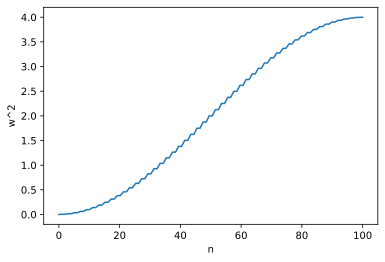

In [164]:
y=eigenvalue.astype('float')
x= np.linspace(0, 100,100)
y1= y
plt.plot(x, y1, '-')
plt.xlabel('n')
plt.ylabel('w^2')
plt.show()

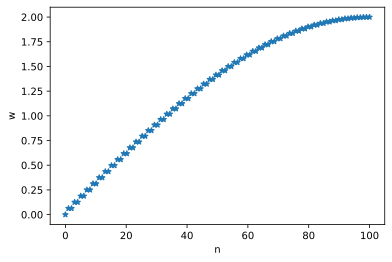

In [165]:
x = np.linspace(0, 100,100)
y= linalg.sqrtm(M)
y ,eigenvector= linalg.eigh(y)
plt.plot(x, y, '*')
plt.xlabel('n')
plt.ylabel('w')
plt.show()

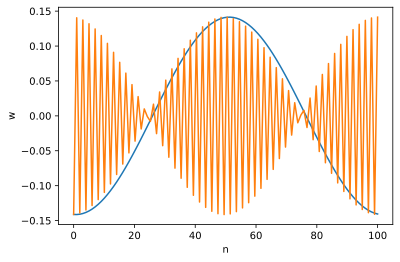

In [166]:
n1, n2 = 1, -3
x = np.linspace(0, 100, 100)
y1= eigenvector[:,n1]
y2= eigenvector[:,n2]
plt.plot(x, y1, '-')
plt.plot(x, y2, '-')
plt.xlabel('n')
plt.ylabel('w')
plt.show()

### (3) Create positions as function of time and shift at specified normal mode

In [167]:
# choose normal mode
n = 1

# position shift of n-th normal mode
xxs = eigenvector[:,n]

# frequency of n-th normal mode
w = np.sqrt(eigenvalue[n])

# enlarge the position shift to plot clearly
xxs = xxs*3

# frequency is fixed to a constsnt to plot clearly
w = 5

# positions that seperate atom from each other
xx0 = np.arange(0,N)*2

# time range
tt = np.linspace(0, 2*np.pi, 80)
xxt = np.sin(tt*w)

# position of time and shift; xx(t,s)
xxts = xx0 + np.tensordot(xxt, xxs, axes=0)

### (4) Plot trajectory and animate for each atom

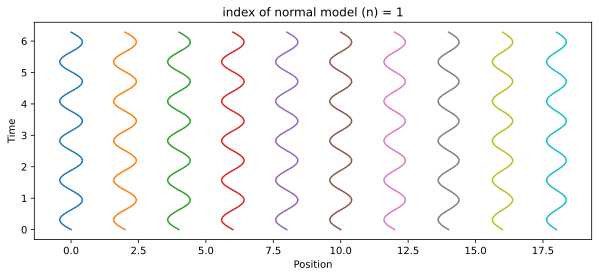

In [168]:
plt.figure(figsize=(10,4))
plt.plot(xxts[:,0:10], tt)
plt.title(f'index of normal model (n) = {n}')
plt.xlabel('Position')
plt.ylabel('Time')
plt.show()

In [169]:
# create animation
animation = create_animation(xxts[:,0:-1])

# display animation
HTML(animation.to_jshtml(fps=30))

In [170]:
# create animation
animation = create_animation(xxts[:,0:10])

# display animation
HTML(animation.to_jshtml(fps=30))

In [171]:
N = 100
S= np.eye(100)
for i in range(0,50):
    S[2*i+1][2*i+1]+=1

print(S.shape)
print(S)

(100, 100)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 2. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 2.]]


In [172]:
eigenvalue, eigenvector = linalg.eigh(M,S)

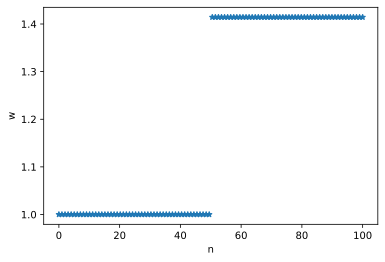

In [173]:
x = np.linspace(0, 100,100)
y= linalg.sqrtm(S)
y ,eigenvector= linalg.eigh(y)
plt.plot(x, y, '*')
plt.xlabel('n')
plt.ylabel('w')
plt.show()

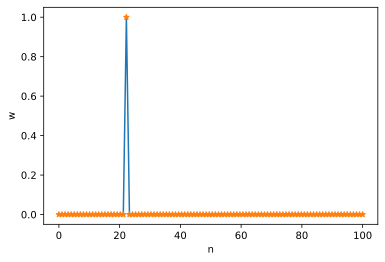

In [182]:
n1, n2 = 1, -3
x = np.linspace(0, 100, 100)
y1= eigenvector[:,n1+10]
y2= eigenvector[:,n2+14]
plt.plot(x, y1, '-')
plt.plot(x, y2, '*')
plt.xlabel('n')
plt.ylabel('w')
plt.show()

In [175]:
# choose normal mode
n = 11

# position shift of n-th normal mode
xxs = eigenvector[:,n]

# frequency of n-th normal mode
w = np.sqrt(eigenvalue[n])

# enlarge the position shift to plot clearly
xxs = xxs*3

# frequency is fixed to a constsnt to plot clearly
w = 5

# positions that seperate atom from each other
xx0 = np.arange(0,N)*2

# time range
tt = np.linspace(0, 2*np.pi, 80)
xxt = np.sin(tt*w)

# position of time and shift; xx(t,s)
xxts = xx0 + np.tensordot(xxt, xxs, axes=0)

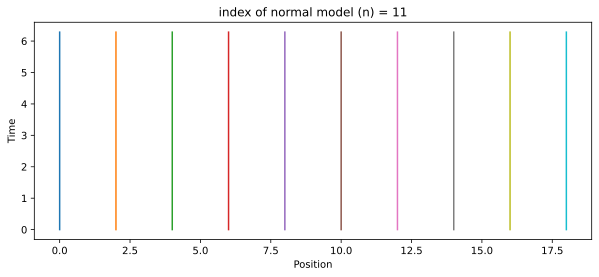

In [176]:
plt.figure(figsize=(10,4))
plt.plot(xxts[:,0:10], tt)
plt.title(f'index of normal model (n) = {n}')
plt.xlabel('Position')
plt.ylabel('Time')
plt.show()

In [177]:
# create animation
animation = create_animation(xxts[:,0:-1])

# display animation
HTML(animation.to_jshtml(fps=30))

In [178]:
# create animation
animation = create_animation(xxts[:,0:10])

# display animation
HTML(animation.to_jshtml(fps=30))